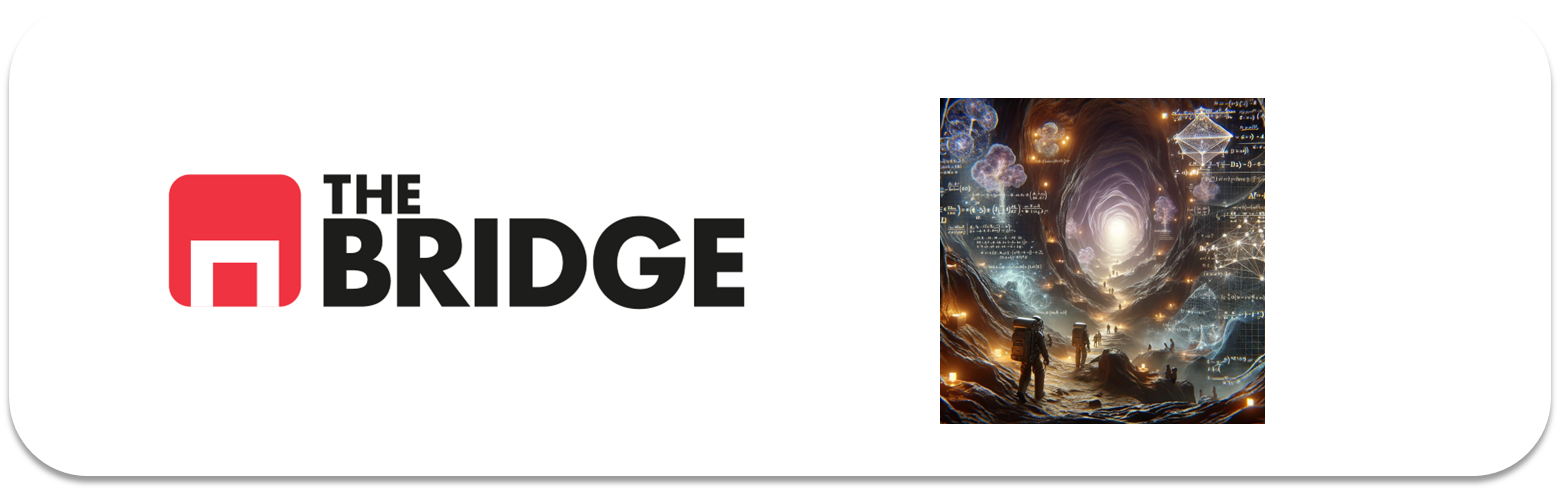

## PRACTICA OBLIGATORIA: **Introducción Deep Learning**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de modelado del dataset del titanic empleando y comparando dos modelos diferentes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.neural_network import MLPClassifier

### Descripción y objetivo

El objetivo de la práctica es crear un modelo DL y compararlo con un modelo Random Forest para el dataset de titanic los dos con el mismo objetivo, predecir la supervivencia de un pasajero.  Se pide:  
1. Desarrollar el proceso de ML hasta crear los dos modelos DL y Random Forest. El primero debe tener una topología MLP (es decir una red densa) con un máximo de 3 capas ocultas y debes emplear sklearn para crearlo. No es necesario hacer una análisis/seleccion exahustivo. Escoge una métrica acorde al tipo de target del problema. 

2. Ambos modelos deben tener sus hiperparámetros optimizados, mediante GridSearch. Para ello: utiliza el grid de parámetros que creas conveniente para Random Forest y para el modelo DL, utiliza un grid con los hiperparámetros siguientes:'hidden_layer_sizes','activation', 'solver','alpha' y 'learning_rate'. Para los rangos del grid del modelo de DL guíate por lo visto en el workout y por los posibles valores que se indican en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier). Prueba por lo menos una topología con una sola capa oculta y otra con más de una capa oculta.   
NOTA: Incluye los valores por defecto de los hiperparámetros escogidos en cada caso dentro del grid de hiperparámetros. 
  

3. Compara los modelos respecto a sus métricas medias de accuracy, precision, recall y tiempos de entrenamiento (para ello tendrás que realizar un entrenamiento a parte del mejor modelo obtenido en la optimización de hiperparámetros) y decide cuál te quedarías argumentándolo.    

4. Para el mejor modelo DL obtenido, muestra su clasification report, y la matriz de confusión comentando el resultado.


In [3]:
df = pd.read_csv("./data/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
df.drop(columns= {"deck", "embark_town", "adult_male", "class", "alive"}, inplace= True)

In [6]:
train_set,test_set = train_test_split(df, test_size= 0.2, random_state= 73)

In [7]:
target = "survived"

In [8]:
es_hombre = train_set.who == "man"
es_mujer = train_set.who == "woman"
es_child = train_set.who == "child"

mean_man = train_set[es_hombre]["age"].mean()
mean_woman = train_set[es_mujer]["age"].mean()
mean_child = train_set[es_child]["age"].mean()
es_nulo = train_set.age.isna()
es_nulo_test = test_set.age.isna()

train_set.loc[es_hombre & es_nulo, "age"] = mean_man
train_set.loc[es_mujer & es_nulo, "age"] = mean_woman
train_set.loc[es_child & es_nulo, "age"] = mean_child

test_set.loc[(test_set.who == "man") & es_nulo_test, "age"] = mean_man
test_set.loc[(test_set.who == "woman") & es_nulo_test, "age"] = mean_woman
test_set.loc[(test_set.who == "child") & es_nulo_test, "age"] = mean_child

In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 800 to 146
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  710 non-null    object 
 8   who       712 non-null    object 
 9   alone     712 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 56.3+ KB


In [10]:
moda_embark = train_set["embarked"].mode()[0]
train_set["embarked"].fillna(moda_embark, inplace = True)

In [11]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 800 to 146
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
 8   who       712 non-null    object 
 9   alone     712 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 56.3+ KB


In [12]:
train_set[target].value_counts(normalize = True)

survived
0    0.605337
1    0.394663
Name: proportion, dtype: float64

<Axes: xlabel='survived', ylabel='percent'>

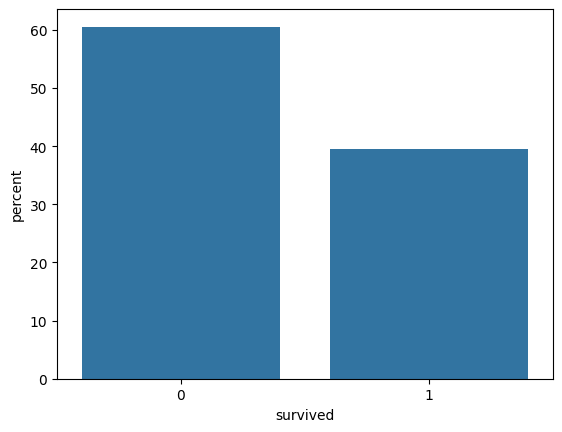

In [13]:
sns.countplot(train_set, x = target, stat= "percent")

In [14]:
features_cat = []
features_num = []
for columna in df.columns:

    if df[columna].dtype == 'object':
        features_cat.append(columna)

    elif (df[columna].dtype in ['float64', 'int64']):
        features_num.append(columna)

In [15]:
features_cat

['sex', 'embarked', 'who']

In [16]:
features_num 

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

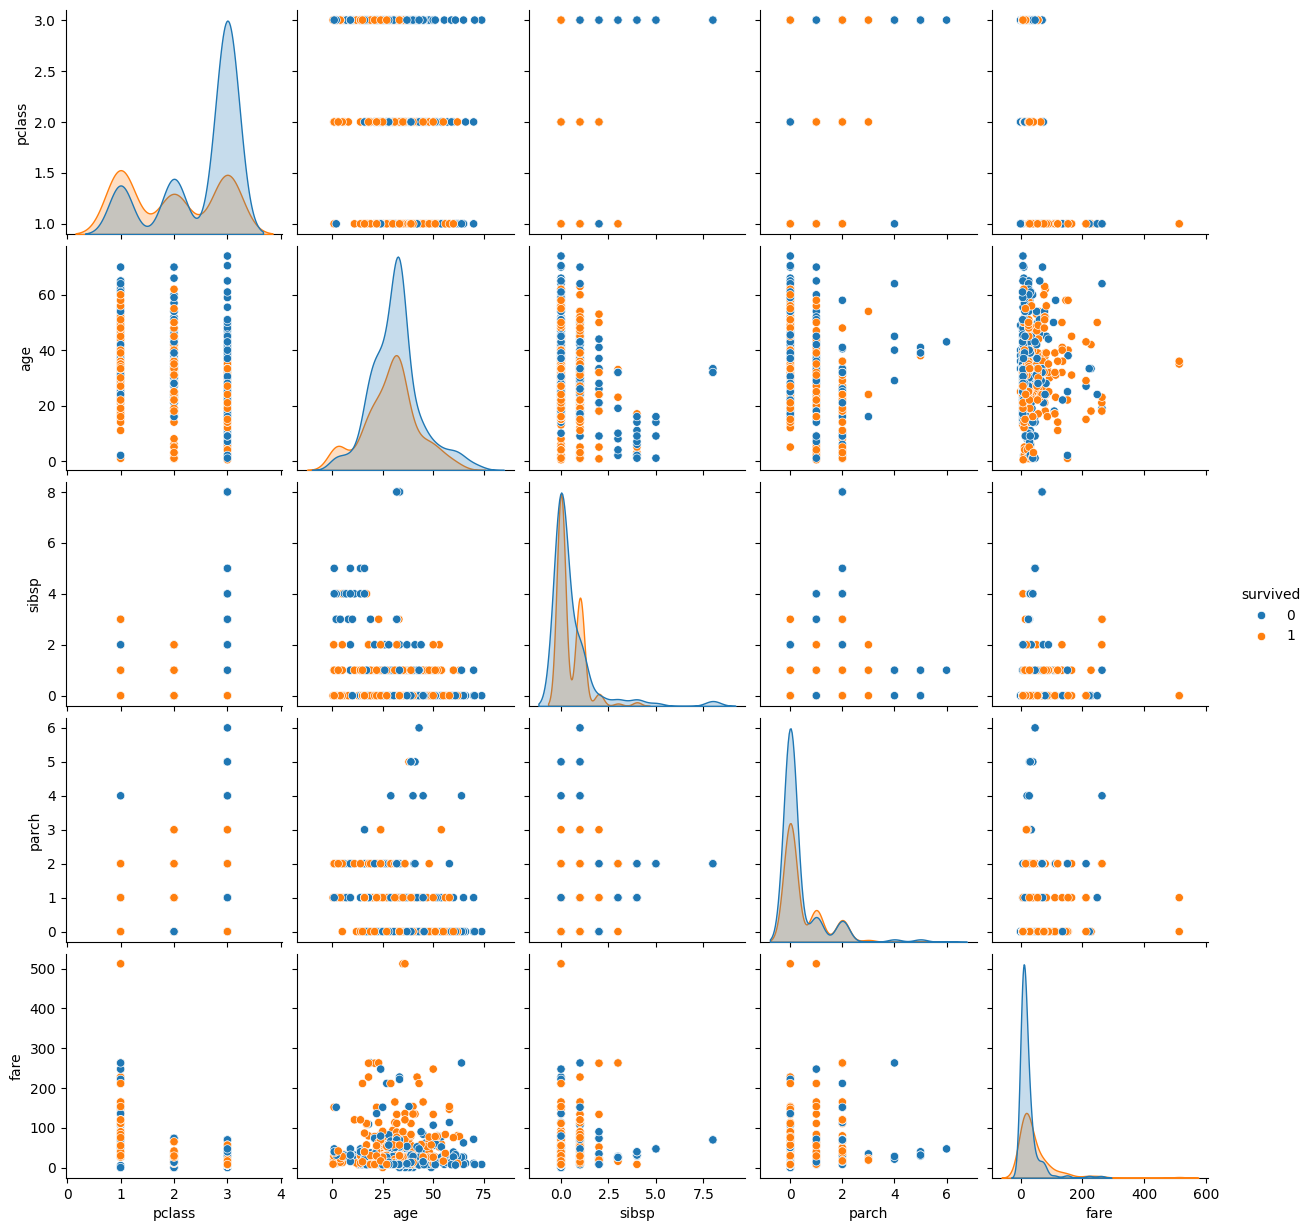

In [17]:
sns.pairplot(train_set[features_num], hue = target)

In [18]:
features_num.remove("survived")

In [19]:
features_num

['pclass', 'age', 'sibsp', 'parch', 'fare']

In [20]:
onehot = OneHotEncoder()
data = onehot.fit_transform(train_set[features_cat]).toarray()
new_features = onehot.get_feature_names_out()
train_set[new_features] = data
train_set.drop(columns= features_cat, axis = 1, inplace = True)

In [21]:
data_test = onehot.transform(test_set[features_cat]).toarray()
new_features_test= onehot.get_feature_names_out()
test_set[new_features_test] = data_test
test_set.drop(columns= features_cat, axis = 1, inplace = True)

In [22]:
train_set

,survived,pclass,age,sibsp,parch,fare,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
800,0,2,34.0,0,0,13.0000,True,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
380,1,1,42.0,0,0,227.5250,True,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
704,0,3,26.0,1,0,7.8542,False,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
682,0,3,20.0,0,0,9.2250,True,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
513,1,1,54.0,1,0,59.4000,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1,2,22.0,1,1,29.0000,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
392,0,3,28.0,2,0,7.9250,False,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
784,0,3,25.0,0,0,7.0500,True,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
394,1,3,24.0,0,2,16.7000,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


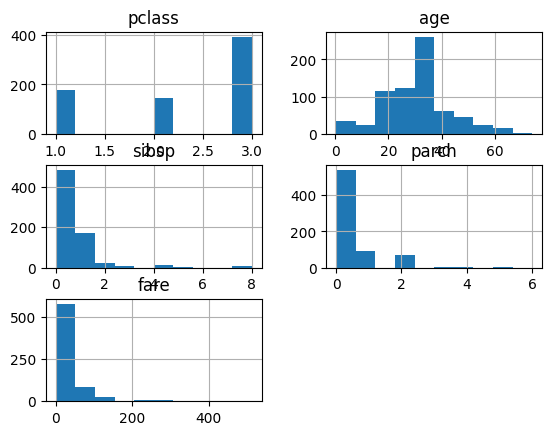

In [23]:
train_set[features_num].hist();

In [24]:
train_set["fare"] = np.sqrt(train_set["fare"])
test_set["fare"] = np.sqrt(test_set["fare"])
train_set["sibsp"] = np.sqrt(train_set["sibsp"])
test_set["sibsp"] = np.sqrt(test_set["sibsp"])
train_set["parch"] = np.sqrt(train_set["parch"])
test_set["parch"] = np.sqrt(test_set["parch"])


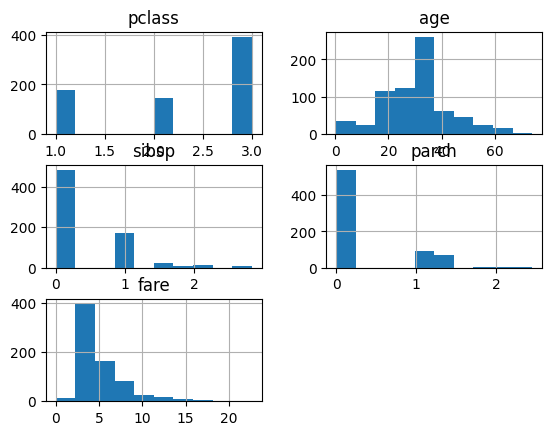

In [25]:
train_set[features_num].hist();

In [26]:
scaler = MinMaxScaler()

In [27]:
train_set[features_num] = scaler.fit_transform(train_set[features_num])

In [28]:
test_set[features_num] = scaler.transform(test_set[features_num])

In [29]:
train_set.shape

(712, 15)

In [30]:
X_train = train_set.drop("survived", axis=1)
y_train = train_set["survived"]
X_test = test_set.drop("survived", axis=1)
y_test = test_set["survived"]

In [31]:
rf_clf = RandomForestClassifier(random_state= 73)
param_grid = {
       'n_estimators': [100, 200, 300],
       'max_depth': [10, 20, 30, None],
       'min_samples_split': [2, 5, 10],
       'min_samples_leaf': [2, 4,6],
       'bootstrap': [True, False],
       "class_weight": ["balanced", None]
   }
start = time.time()
rf_grid = GridSearchCV(rf_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring = "accuracy",
                       n_jobs = -1)

rf_grid.fit(X_train, y_train)

end = time.time()

train_time = end - start

start = time.time()
y_pred = rf_grid.predict(X_test)
end = time.time()

pred_time = end - start

rf_grid_metrics = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                            'precision': precision_score(y_test, y_pred, average = "macro"),
                            'recall': recall_score(y_test, y_pred, average = "macro"),
                            'train_time': train_time,
                            'pred_time': pred_time}, index=['RandomForest']
                            )
rf_grid_metrics.head()

,accuracy,precision,recall,train_time,pred_time
RandomForest,0.849162,0.831541,0.834121,103.914285,0.008974


In [37]:
mlp = MLPClassifier(random_state= 73)
params = {"max_iter": [500,1000,2000],
         "activation":['relu',"identity", "tanh"],
         "solver": ["adam", "sgd"],
         "alpha" :[0.0001, 0.01],
         "learning_rate":["constant", "adaptive"]
}

start = time.time()
mlp_grid = GridSearchCV(mlp,
                       param_grid= params,
                       cv = 5,
                       scoring = "accuracy",
                       n_jobs = -1)


mlp_grid.fit(X_train, y_train)
end = time.time()

train_time = end - start

start = time.time()
y_pred = mlp_grid.predict(X_test)
end = time.time()

pred_time = end - start

mlp_grid_metrics = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                            'precision': precision_score(y_test, y_pred, average = "macro"),
                            'recall': recall_score(y_test, y_pred, average = "macro"),
                            'train_time': train_time,
                            'pred_time': pred_time}, index=['mlp_grid']
                            )
mlp_grid_metrics.head()

,accuracy,precision,recall,train_time,pred_time
mlp_grid,0.854749,0.842033,0.830439,66.224988,0.001113


In [41]:
mlp_2 = MLPClassifier(random_state= 73)
params2 = {"max_iter": [500,1000,2000],
           "hidden_layer_sizes": [300,300,300],
         "activation":['relu',"identity", "tanh"],
         "solver": ["adam", "sgd"],
         "alpha" :[0.0001, 0.01],
         "learning_rate":["constant", "adaptive"]
}

start = time.time()
mlp_grid_2 = GridSearchCV(mlp_2,
                       param_grid= params2,
                       cv = 5,
                       scoring = "accuracy",
                       n_jobs = -1)
start = time.time()
mlp_grid_2.fit(X_train, y_train)
end = time.time()

train_time = end - start

start = time.time()
y_pred_2 = mlp_grid_2.predict(X_test)
end = time.time()

pred_time = end - start


mlp_metrics_2 = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_2),
                            'precision': precision_score(y_test, y_pred_2, average = "macro"),
                            'recall': recall_score(y_test, y_pred_2, average = "macro"),
                            'train_time': train_time,
                            'pred_time': pred_time}, index=['mlp_3_capas']
                            )
mlp_metrics_2.head()

,accuracy,precision,recall,train_time,pred_time
mlp_3_capas,0.854749,0.842033,0.830439,524.843874,0.0


In [42]:
metrics = pd.concat([rf_grid_metrics, mlp_grid_metrics, mlp_metrics_2])
metrics.head()

,accuracy,precision,recall,train_time,pred_time
RandomForest,0.849162,0.831541,0.834121,103.914285,0.008974
mlp_grid,0.854749,0.842033,0.830439,66.224988,0.001113
mlp_3_capas,0.854749,0.842033,0.830439,524.843874,0.000000


- Me quedo con MLP con una sola capa, porque me da el mismo resultado que con tres capas y tarda mucho menos en entrenar

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       118
           1       0.81      0.75      0.78        61

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



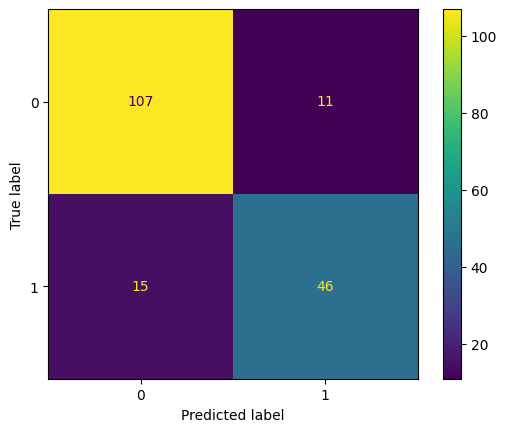

In [46]:
y_pred = mlp_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

- Los datos estaban desbalanceados por eso el modelo predice la clase mayoritaria que es la clase 0. 